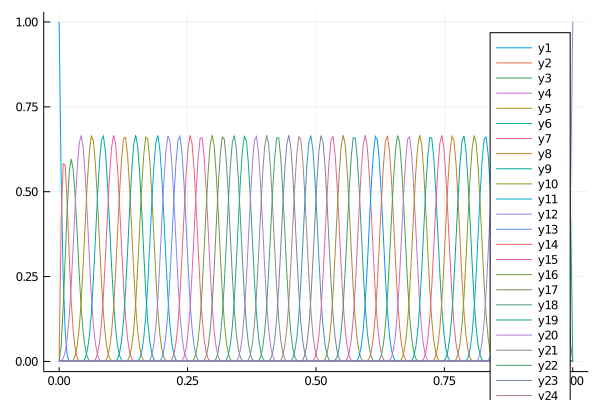

In [12]:
# 演習問題2
push!(LOAD_PATH,"./")
using Plots
using Bspline

function prefinement(pb,pa,k)    # pb:リファインメント前のp, pa:リファインメント後のp
    l = k[1]
    r = k[end]
    n = pa-pb
    prepend!(k,[l for i in 1:n])
    append!(k,[r for i in 1:n])
end

function hrefinement(p,k,M)    # M:リファインメント後の基底関数の個数
    N = M-p
    for i in 1:N-1
        insert!(k,p+1+i,i/N)
    end
end

function plotBs(p,k)
    tl = 256
    t = collect(range(1.0e-10,1.0-1.0e-10,length=tl))
    v = zeros(Float64,(M,tl))
    for i in 1:M
        for j in 1:tl
            v[i,j] = Bs(i,p,k,t[j])
        end
    end
    plot(t,v')
end

# 初期の基底関数
p = 1
k = [0.0, 0.0, 1.0, 1.0]

# refinement後の基底関数の設定
M = 50
pr = 3

prefinement(p,pr,k)
hrefinement(pr,k,M)
plotBs(pr,k)